In [1]:
from triqs.gf import Gf, MeshImFreq, iOmega_n, inverse
from numpy import linspace

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']=100 

In [3]:
from triqs.plot.mpl_interface import oplot, plt

### <i class="fa fa-gear fa-x" style="color: #186391"></i> Exercise 1

Plot the density $n(\epsilon)$ as a function of $\epsilon$ for a Green's function $G = 1/(i\omega_n - \epsilon)$. What is the curve that you obtained? How does it change with temperature?

In [4]:
betas    = linspace(1.,10.,9)
epsilons = linspace(-10.,10.,41)

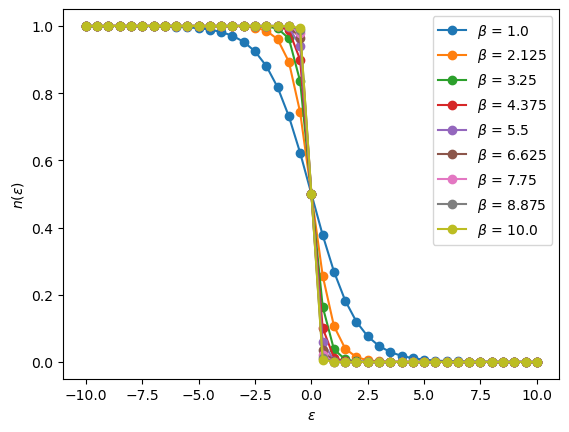

In [5]:
for beta in betas:
    iw_mesh = MeshImFreq(beta=beta, statistic='Fermion', n_iw=1000)
    G = Gf(mesh=iw_mesh, target_shape=[])
    densities = []
    for epsilon in epsilons:
        G << inverse(iOmega_n - epsilon)
        densities += [G.density().real]
    plt.plot(epsilons, densities, '-o', label=rf'$\beta$ = {beta}')
plt.xlabel(r'$\varepsilon$')
plt.ylabel(r'$n(\varepsilon)$')
plt.legend(loc=1)
plt.show()

### <i class="fa fa-gear fa-x" style="color: #186391"></i> Exercise 4

Consider a Hubbard atom with $U=2$ at temperature $T = 1/\beta = 1/10$. The non-interacting and interacting Green's functions for this problem are:

$$
G_0 = \frac{1}{i \omega_n + \mu} \qquad \mu = U/2
$$

$$
G = \frac{1}{2(i\omega_n + U/2)} + \frac{1}{2(i\omega_n - U/2)}
$$

Here the chemical potential $\mu$ is chosen such that the interacting system is half filled.

Using Dyson's equation, verify that the corresponding self-energy is indeed

$$
\Sigma = \frac{U}{2} + \frac{U^2}{4 i\omega_n}
$$

*Note: At half-filling the chemical potential $\mu = U/2$ and the static part of the self-energy exactly cancel.*

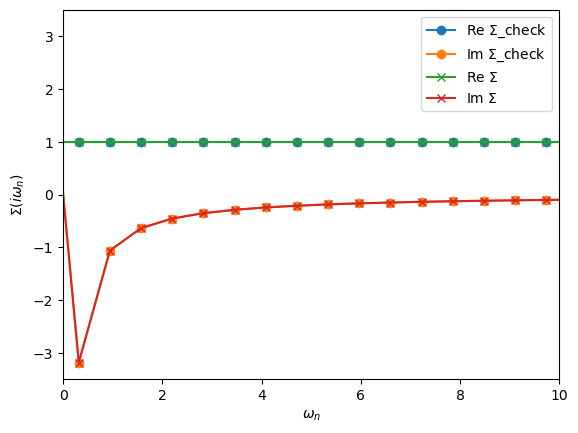

In [6]:
# Parameters
U = 2.0

# Green's function containers
iw_mesh = MeshImFreq(beta=10, statistic='Fermion', n_iw=1000)
G_0 = Gf(mesh=iw_mesh, target_shape=[])
G = G_0.copy()
Sigma = G_0.copy()
Sigma_check = G_0.copy()

# Green's functions of the Hubbard atom
G_0 << inverse(iOmega_n + U/2)
G << 0.5*inverse(iOmega_n + U/2) + 0.5*inverse(iOmega_n - U/2)

# Dyson's equation to find the self-energy
Sigma << inverse(G_0) - inverse(G)

# Known analytical solution
Sigma_check << U/2 + U*inverse(2*iOmega_n)

oplot(Sigma_check, '-o', name=r'$\Sigma$_check')
oplot(Sigma, '-x', name=r'$\Sigma$')
plt.xlim(0,10)
plt.show()